In [221]:
import numpy as np
import os
import time
from sklearn.metrics import confusion_matrix

In [222]:
X_TRAIN_PATH = 'MNIST/digit_xtrain.csv'
X_TEST_PATH = 'MNIST/digit_xtest.csv'
Y_TRAIN_PATH = 'MNIST/digit_ytrain.csv'
Y_TEST_PATH = 'MNIST/digit_ytest.csv'

In [223]:
y_train_all = np.loadtxt(Y_TRAIN_PATH,delimiter=',',dtype=int)
y_train_all.shape

(60000,)

In [224]:
y_test = np.loadtxt(Y_TEST_PATH,delimiter=',',dtype=int)
y_test.shape

(10000,)

In [225]:
x_train_all = np.loadtxt(X_TRAIN_PATH,delimiter=',',dtype=int)
x_train_all.shape

(60000, 784)

In [226]:
x_test = np.loadtxt(X_TEST_PATH,delimiter=',',dtype=int)
x_test.shape

(10000, 784)

In [227]:
X = np.append(x_test,x_train_all,axis =0)
X.shape

(70000, 784)

In [228]:
y = np.append(y_test,y_train_all,axis =0)
y.shape

(70000,)

In [230]:
count_of_digits = [] 

In [243]:
i = 0
k = 0
for k in range(0,70000):
    if (y[k] == 9):
        i = i+1
count_of_digits.append(i)
print(i)    

6958


In [244]:
print(count_of_digits)

[6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958]


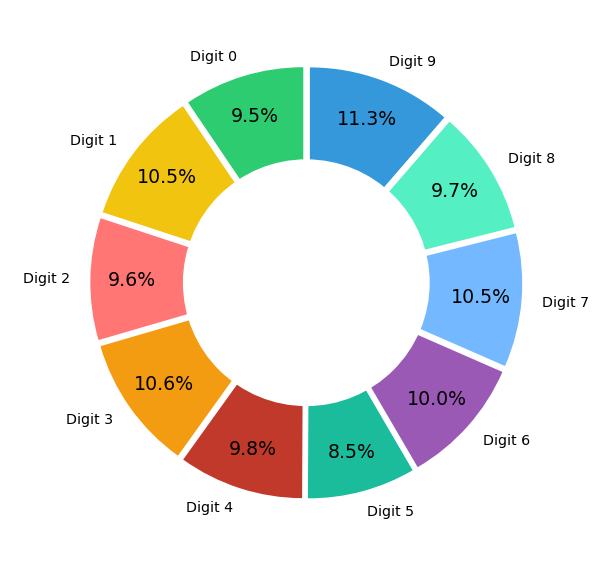

In [246]:
category_names = ['Digit 0','Digit 1','Digit 2','Digit 3','Digit 4','Digit 5','Digit 6','Digit 7','Digit 8','Digit 9']
sizes = [946,1048,957,1058,983,849,1003,1049,973,1134]
customs_colors = ['#2ecc71','#f1c40f','#ff7675','#f39c12','#c0392b','#1abc9c','#9b59b6','#74b9ff','#55efc4','#3498db']
offset = [0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05]
plt.rcParams['font.size'] = 4.5

plt.figure(figsize=(3,3),dpi=227)
plt.pie(sizes,labels=category_names,textprops={'fontsize':6},startangle = 90,
        autopct = '%1.1f%%',colors = customs_colors,pctdistance=0.8,explode=offset)

center_circle = plt.Circle((0,0),radius = 0.6,fc='white')
plt.gca().add_artist(center_circle)

# Data visulization

In [76]:
X[0].shape

(784,)

In [69]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

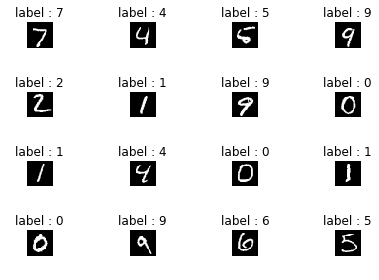

In [142]:
fig, ax = plt.subplots(4,4)

for i in range(16):
    lab = str(y[i])
    image = np.array(X[i], dtype='uint8') 
    image = image.reshape((28,28))
    if i in [0,1,2,3]:
        j = 0;
        ax[i,j].imshow(image, cmap='gray')
        ax[i,j].set_title("label : " + lab)
        ax[i,j].axis("off")
    if i in [4,5,6,7]:
        j = 1;
        k = i-4;
        ax[k,j].set_title("label : " + lab)
        ax[k,j].imshow(image, cmap='gray')
        ax[k,j].axis("off")
    if i in [8,9,10,11]:
        j = 2;
        k = i-8;
        ax[k,j].set_title("label : " + lab)
        ax[k,j].imshow(image, cmap='gray')
        ax[k,j].axis("off")
    if i in [12,13,14,15]:
        j = 3;
        k = i-12;
        ax[k,j].set_title("label : " + lab)
        ax[k,j].imshow(image, cmap='gray')
        ax[k,j].axis("off")
fig.tight_layout()
plt.show()            

In [ ]:
image = np.array(X[i], dtype='uint8')
image = image.reshape((28,28))
ax1 = plt.imshow(image, cmap='gray')

f, axarr = plt.subplots(2,2)

axarr[0,0].imshow(image_datas[0])
axarr[0,1].imshow(image_datas[1])
axarr[1,0].imshow(image_datas[2])
axarr[1,1].imshow(image_datas[3])

In [83]:
print(y[0])

7


In [14]:
y[1:7]

array([2, 1, 0, 4, 1, 4])

In [9]:
X = X/255

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
def model1(trdata,tract,tsdata):
    clf.fit(trdata,tract);
    pred= clf.predict(tsdata);
    return pred
cou = 0
acc_RF = np.zeros((5,1))
from sklearn.model_selection import KFold
for tr_idx,ts_idx in KFold(5).split(X):
    tr_dt = X[tr_idx] 
    tst_dt = X[ts_idx] 
    tr_y = y[tr_idx] 
    ts_y = y[ts_idx]
    pred = model1(tr_dt,tr_y,tst_dt)
    acc_RF[cou,0]=accuracy_score(ts_y,pred)
    cou = cou + 1

In [17]:
acc_RF

array([[0.97128571],
       [0.96607143],
       [0.96578571],
       [0.96657143],
       [0.971     ]])

In [19]:
import pandas as pd

In [22]:
acc = pd.DataFrame(acc_RF,columns = ['Random Forest'])
acc

,Random Forest
0,0.971286
1,0.966071
2,0.965786
3,0.966571
4,0.971000


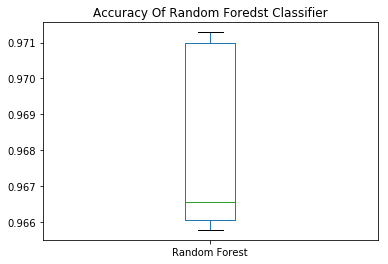

In [28]:
%matplotlib inline
acc.plot(grid = False,title ="Accuracy Of Random Foredst Classifier",kind="box")

In [31]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
cou = 0
acc_DT = np.zeros((5,1))
from sklearn.model_selection import KFold
for tr_idx,ts_idx in KFold(5).split(X):
    tr_dt = X[tr_idx] 
    tst_dt = X[ts_idx] 
    tr_y = y[tr_idx] 
    ts_y = y[ts_idx]
    pred = model1(tr_dt,tr_y,tst_dt)
    acc_DT[cou,0]=accuracy_score(ts_y,pred)
    cou = cou + 1

In [33]:
X.shape

(70000, 784)

In [247]:
acc_DT = pd.DataFrame(acc_DT,columns = ['Decision Tree'])
acc_DT

,Decision Tree
0,0.878286
1,0.863000
2,0.867357
3,0.866500
4,0.875500


   Random Forest  Decision Tree
0       0.971286       0.878286
1       0.966071       0.863000
2       0.965786       0.867357
3       0.966571       0.866500
4       0.971000       0.875500


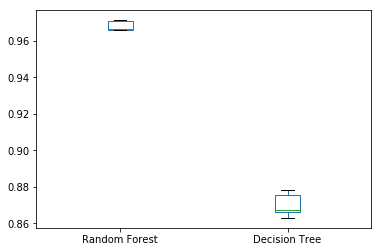

In [49]:
acc_new = np.append(acc_RF,acc_DT,axis =1)
acc_new = pd.DataFrame(acc_new,columns=["Random Forest","Decision Tree"])
print(acc_new)
acc_new.plot(kind="box")

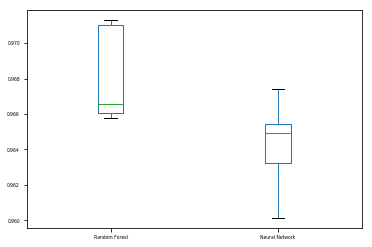

In [263]:
acc=[[0.96742857], [0.96014285] ,[0.96542859],[0.96324863] ,[0.96492857]]
acc_new = np.append(acc_RF,acc,axis =1)
acc_new = pd.DataFrame(acc_new,columns=["Random Forest","Neural Network"])
acc_new.plot(kind="box")

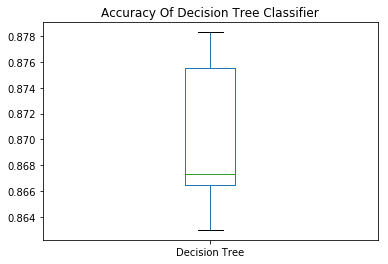

In [50]:
acc_DT  = pd.DataFrame(acc_DT,columns = ['Decision Tree'])
acc_DT
%matplotlib inline
acc_DT.plot(grid = False,title ="Accuracy Of Decision Tree Classifier",kind="box")

In [55]:
import cv2

In [54]:
!pip install opencv-contrib-python

You are using pip version 10.0.1, however version 20.2b1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [56]:
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     